In [2]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

[*********************100%***********************]  1 of 1 completed


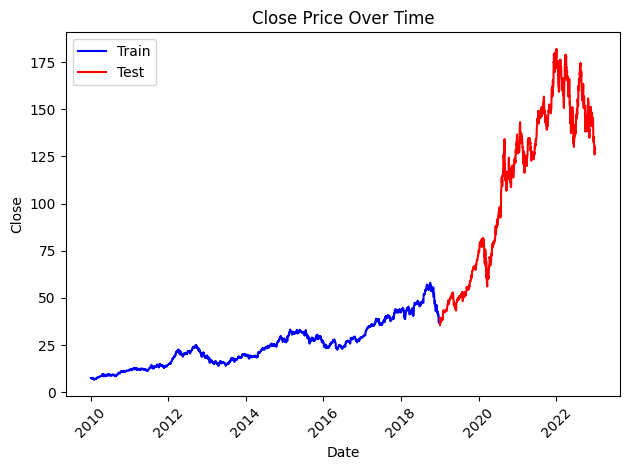

In [3]:
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
data = Data('AAPL',start_date,end_date,2019)
data.data_preprocess()

Running ring
GENERATION 0 START
Generation 0: Best fitness = 425.71293517304167 Average Fitness = 204.74984980288187
GENERATION 0 END
GENERATION 1 START
Generation 1: Best fitness = 507.41136311840245 Average Fitness = 240.1171229756627
GENERATION 1 END
GENERATION 2 START
Generation 2: Best fitness = 552.4842096673326 Average Fitness = 266.2687556592765
GENERATION 2 END
GENERATION 3 START
Generation 3: Best fitness = 579.5391754514528 Average Fitness = 303.64548568407616
GENERATION 3 END
GENERATION 4 START
Generation 4: Best fitness = 587.6440368249146 Average Fitness = 332.88284061540344
GENERATION 4 END
GENERATION 5 START
Generation 5: Best fitness = 640.319120757909 Average Fitness = 357.26194821615456
GENERATION 5 END
GENERATION 6 START
Generation 6: Best fitness = 640.319120757909 Average Fitness = 399.58321677971406
GENERATION 6 END
GENERATION 7 START
Generation 7: Best fitness = 640.319120757909 Average Fitness = 419.9525486189076
GENERATION 7 END
GENERATION 8 START
Generation 8

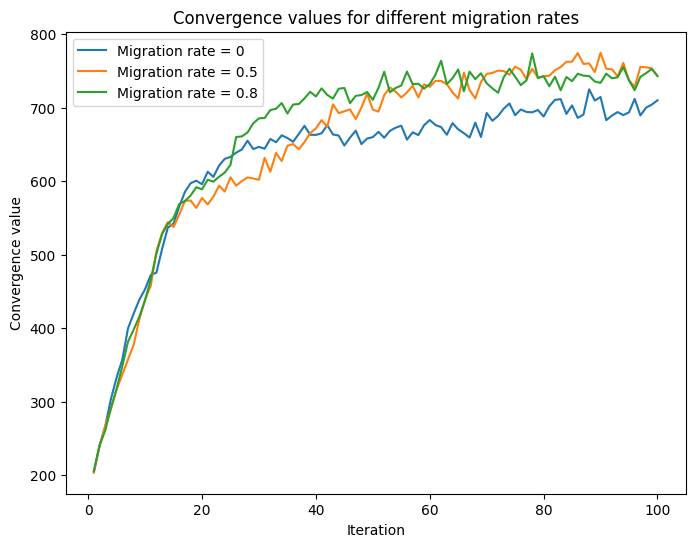

In [4]:
# ring
values = []
migration_rates = [0, 0.5 , 0.8]

for i in migration_rates:
    ga = IslandGGA(data=data.train_data,num_islands=8,m_iter= 10,num_iter=100,n_migrants_rate=i,pSize=200,r_cross=0.4,r_mut=0.1,strategies=data.strategies,evolve_strategy="ring")
    ga.evolve()
    values.append(ga.convergence_values)
   
# convergence values for each crossover rate
convergence_values = values
# plot the convergence values for each crossover rate
plt.figure(figsize=(8, 6))
for i in range(len(migration_rates)):
    plt.plot(np.arange(1, 101), convergence_values[i], label='Migration rate = ' + str(migration_rates[i]))
plt.xlabel('Iteration')
plt.ylabel('Convergence value')
plt.title('Convergence values for different migration rates')
plt.legend()
plt.show()

Running multikuti
GENERATION 0 START
Generation 0: Best fitness = 397.88049218542574 Average Fitness = 207.98864102535305
GENERATION 0 END
GENERATION 1 START
Generation 1: Best fitness = 422.4758881406449 Average Fitness = 244.43428104772238
GENERATION 1 END
GENERATION 2 START
Generation 2: Best fitness = 479.83068889453904 Average Fitness = 271.3350051874328
GENERATION 2 END
GENERATION 3 START
Generation 3: Best fitness = 527.2104261014284 Average Fitness = 294.7961126859867
GENERATION 3 END
GENERATION 4 START
Generation 4: Best fitness = 537.8744419927016 Average Fitness = 315.0173874861723
GENERATION 4 END
GENERATION 5 START
Generation 5: Best fitness = 598.8200181622809 Average Fitness = 344.4007584142138
GENERATION 5 END
GENERATION 6 START
Generation 6: Best fitness = 603.2192826732684 Average Fitness = 378.90149171915283
GENERATION 6 END
GENERATION 7 START
Generation 7: Best fitness = 672.7458840236942 Average Fitness = 409.96671832790514
GENERATION 7 END
GENERATION 8 START
Gener

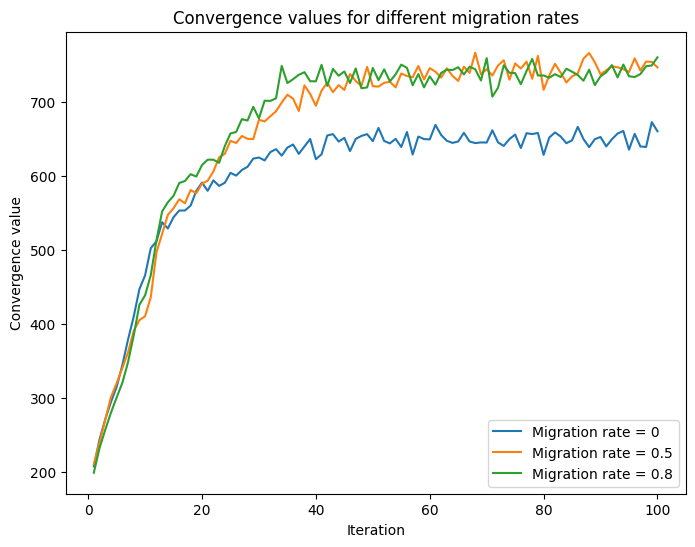

In [10]:
# multikuti
values = []
migration_rates = [0, 0.5 , 0.8]

for i in migration_rates:
    ga = IslandGGA(data=data.train_data,num_islands=8,m_iter= 10,num_iter=100,n_migrants_rate=i,pSize=200,r_cross=0.4,r_mut=0.1,strategies=data.strategies,evolve_strategy="multikuti")
    ga.evolve()
    values.append(ga.convergence_values)
   
# convergence values for each crossover rate
convergence_values = values
# plot the convergence values for each crossover rate
plt.figure(figsize=(8, 6))
for i in range(len(migration_rates)):
    plt.plot(np.arange(1, 101), convergence_values[i], label='Migration rate = ' + str(migration_rates[i]))
plt.xlabel('Iteration')
plt.ylabel('Convergence value')
plt.title('Convergence values for different migration rates')
plt.legend()
plt.show()

In [1]:
from scipy import stats

# Compare the convergence metrics of the two algorithms
t_statistic, p_value = stats.ttest_ind(values[0], values[1])

# Print the results
if p_value < 0.05:
    print("The difference in convergence is statistically significant.")
else:
    print("The difference in convergence is not statistically significant.")


NameError: name 'values' is not defined